# Naive Elbow Inspection
- This “elbow” cannot always be unambiguously identified
- One proposed way 
- As this notebook demonstrates that it doesnt work so well 
- In the next notebook, we will use a modification of the elbow test that works well with the generated dataset

## Conclusion 
- Modify the "elbow test" to get a "better k" which will be done in the next notebook 

## One way I tried is the method proposed in link below
- [October 2, 2017, Asanka Perera, Finding the optimal number of clusters for K-Means through Elbow method using a mathematical approach compared to graphical approach](https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera/)
- IMPORTANT: This didn't work so well in my synthetic data set

![](./img/elbow.png)

# Other methods
- The most popular are elbow method, gap statistics, and silhoutte method but all of them can converge to a proposed number of clusters as is shown in this link below
- [DataNova: Determining The Optimal Number Of Clusters: 3 Must Know Methods ](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/)

![](./img/methods.png)

In [1]:
# x_kmeans returns error per k
# kmeans returns k and data labels
from KMeans import kmeans_elbow

# A list of four sets of 2d points
from oldsamplesgen import gen_set1
# helper plotting functions visualize what kmeans is doing
from kmeansplottinghelper import initial_plots, colored_plots, eval_plots

import numpy as np
import matplotlib.pyplot as plt

# We're assuming that we don't need to scale the data 
#from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Load 4 data sets of 2d points with clusters [2, 3, 4, 5] respectively 
pointset = gen_set1()

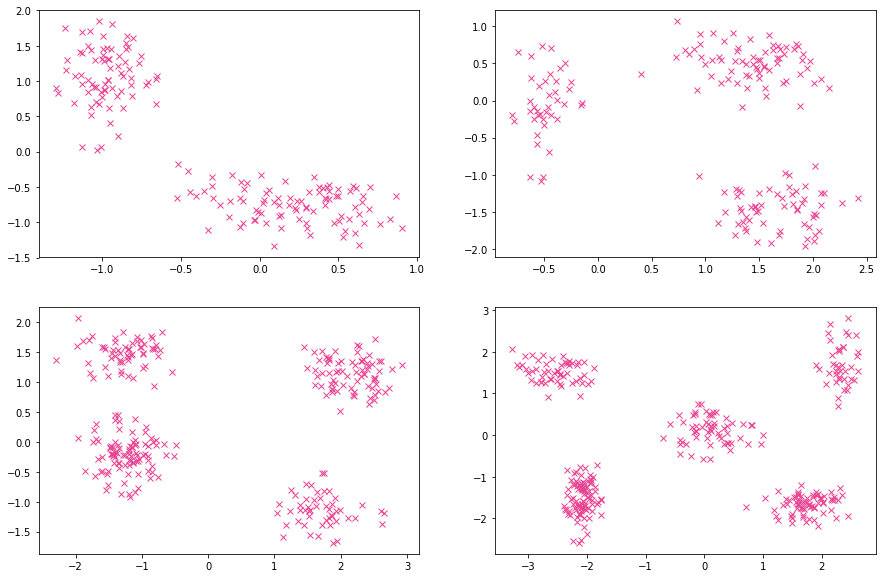

In [3]:
# They look like this
initial_plots(pointset)

In [4]:
# get the error set to plot the elbows
# and also returns the set the evaluated ks for each set
def test_elbow_kmeans(pointset):
    errorset, ks = [], []
    
    for i, points in enumerate(pointset):
        data = pointset[i]
        # Make sure to shuffle the data, as they sorted by label
        np.random.shuffle(data)
        k, errors = kmeans_elbow(data)
        errorset.append(errors)
        ks.append(k)

    return ks, errorset 

........................................ks should be be [2, 3, 4, 5] 
BUT UNFORTUNATELY THIS ISN'T THE CASE :(

Proposed k for each set: [2, 3, 3, 4]


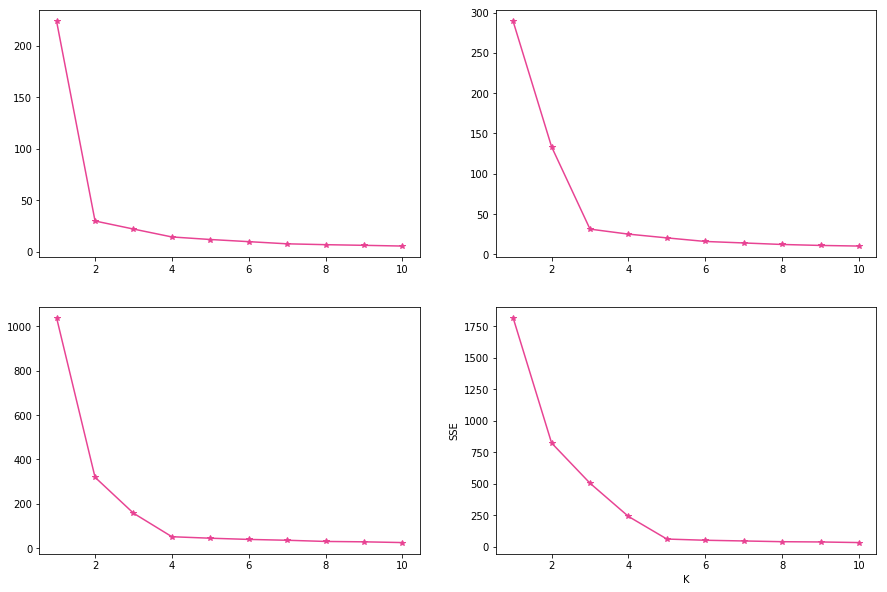

In [5]:
ks, errorset = test_elbow_kmeans(pointset)
# shape 4 sets of 10 items (1 error per k)
# also outputs four recommend ks respectively

print("ks should be be [2, 3, 4, 5] ")
print("BUT UNFORTUNATELY THIS ISN'T THE CASE :(")
print()
print("Proposed k for each set:", ks)

eval_plots(np.array(errorset), [k for k in range(1, 11)])
# Show elbow plots for each set of points 